In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
from shapely.geometry import Polygon
import geopandas as gpd
import os.path
from PIL import Image
import rasterio

In [13]:
# read in all of your files
os.chdir("/Users/aminaly/Box Sync/mountain_biodiversity")

kba = gpd.read_file(os.getcwd() + "/data/KBA/KBA2020/KBAsGlobal_2020_September_02_POL.shp")
wdpa0 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_0/WDPA_May2021_Public_shp-polygons.shp")
wdpa1 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_1/WDPA_May2021_Public_shp-polygons.shp")
wdpa2 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_2/WDPA_May2021_Public_shp-polygons.shp")
gmba = gpd.read_file(os.getcwd() + "/data/GMBA/GMBA_Inventory_V2_20210422/GMBA_Inventory_V2_20210422.shp")

Image.MAX_IMAGE_PIXELS = 933120000
mountain = Image.open(os.getcwd() + "/data/WDPA/K1_binary_from_WCMC_2021.tiff")
mountain.show()

In [14]:
#combine the three wdpa files into 1
wdpa = gpd.GeoDataFrame(pd.concat([wdpa0, wdpa1, wdpa2]))
wdpa.to_crs('epsg:4326')
wdpa.crs = {'init': 'epsg:4326', 'no_defs': True}

In [16]:
# select lat and lons for subset (currently: Europe)
bbox = gpd.GeoSeries([Polygon([(35,-3), (55, -3), (55, 10), (35, 10)])])
box = gpd.GeoDataFrame({'geometry': bbox})
box.crs = {'init': 'epsg:4326', 'no_defs': True}

wdpa_clipped = gpd.overlay(wdpa, box, how="intersection")
kba_clipped = gpd.overlay(kba, box, how="intersection")
gmba_clipped = gpd.overlay(gmba, box, how="intersection")

In [21]:
kba_clipped.to_file(os.getcwd() + "/data/clipped/kba2020.shp")
wdpa_clipped.to_file(os.getcwd() + "/data/clipped/wdpa2020.shp")
gmba_clipped.to_file(os.getcwd() + "/data/clipped/gmba2020.shp")
wdpa_total.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp-polygons.shp")


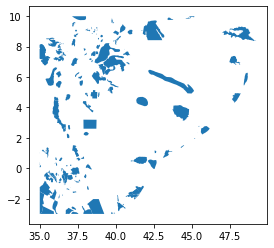

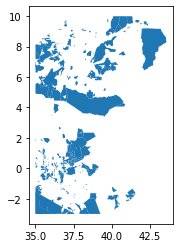

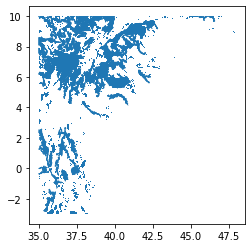

In [22]:
kba_clipped.plot()
gmba_clipped.plot()

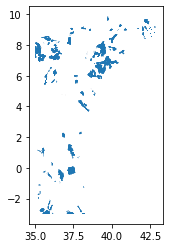

In [27]:
wdpa_clip_kba = gpd.overlay(wdpa_clipped, kba_clipped, how = "intersection")
all_intersec = gpd.overlay(wdpa_clip_kba, gmba_clipped, how = "intersection")
all_intersec.plot()

In [47]:
wdpa_clipped.to_crs("EPSG:4326")

RuntimeError: b'no arguments in initialization list'